# Jugo project

In [247]:
import warnings
warnings.simplefilter("ignore")

## Introduction

The goal for our project is to make an accurate system, potentially developed into an app for our 
client that makes him a time-saving daily schedule where it is shown how long it would take him to 
travel to both locations,  based on weather and traffic data.


In this project, we will be working with three distinct datasets. Each dataset will undergo a thorough examination to identify and perform necessary data cleaning and preprocessing steps. Oncethis is completed, the datasets will bemergedd into a single, unified dataset. Finally, we will apply a Gradient Boosting Machine model to train on this integrated dataset.Now, we would import the first out of the three dataframes:.

## Importing the necessary libraries

In [248]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

## Weather data
The weather data that is imported here is taken from the **WeatherDataCleaning file**, where detailed steps about the cleaning of the dataset have been specified as well as a description about the different column name meanings.
### Importing the data

In [249]:
df = pd.read_csv("datasets/CleanWeather.csv")
df.head()

,Date (YYYY-MM-DD),Station ID,Hour,Hourly Average Wind Speed (m/s),Wind Speed (m/s),Highest Wind Gust (m/s),Temperature (0.1°C),Duration of Precipitation (hours),Precipitation Amount (mm),Visibility (m),Fog Indicator,Rainfall Indicator,Snow Indicator,Thunderstorm Indicator,Ice Formation Indicator,Month,Season,DOP Sector
0,1951-01-01,380,23,98.000000,0.0,90.158365,22.0,0.0,0.83167,53.267449,0.0,0.0,0.0,0.0,0.0,1,Winter,0
1,1951-01-01,310,3,87.000000,87.0,89.262892,14.0,0.0,0.83167,51.162157,0.0,0.0,0.0,0.0,0.0,1,Winter,0
2,1951-01-01,310,2,93.000000,0.0,89.261606,11.0,0.0,0.83167,51.603766,0.0,0.0,0.0,0.0,0.0,1,Winter,0
3,1951-01-01,310,1,93.000000,0.0,89.371168,9.0,0.0,0.83167,52.037477,0.0,0.0,0.0,0.0,0.0,1,Winter,0
4,1951-01-01,290,24,60.025576,62.0,89.727013,21.0,0.0,0.83167,52.616341,0.0,0.0,0.0,0.0,0.0,1,Winter,0


In [250]:
df.shape

(19188675, 18)

### Checking missing data and data types

In [251]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19188675 entries, 0 to 19188674
Data columns (total 18 columns):
 #   Column                             Dtype  
---  ------                             -----  
 0   Date (YYYY-MM-DD)                  object 
 1   Station ID                         int64  
 2   Hour                               int64  
 3   Hourly Average Wind Speed (m/s)    float64
 4   Wind Speed (m/s)                   float64
 5   Highest Wind Gust (m/s)            float64
 6   Temperature (0.1°C)                float64
 7   Duration of Precipitation (hours)  float64
 8   Precipitation Amount (mm)          float64
 9   Visibility (m)                     float64
 10  Fog Indicator                      float64
 11  Rainfall Indicator                 float64
 12  Snow Indicator                     float64
 13  Thunderstorm Indicator             float64
 14  Ice Formation Indicator            float64
 15  Month                              int64  
 16  Season          

In [252]:
df.isna().sum()

Date (YYYY-MM-DD)                    0
Station ID                           0
Hour                                 0
Hourly Average Wind Speed (m/s)      0
Wind Speed (m/s)                     0
Highest Wind Gust (m/s)              0
Temperature (0.1°C)                  0
Duration of Precipitation (hours)    0
Precipitation Amount (mm)            0
Visibility (m)                       0
Fog Indicator                        0
Rainfall Indicator                   0
Snow Indicator                       0
Thunderstorm Indicator               0
Ice Formation Indicator              0
Month                                0
Season                               0
DOP Sector                           0
dtype: int64

It can be concluded that the file got imported correctly and is ready to be used further.

## Traffic data
The traffic data that is imported here is taken from the **TrafficDataCleaning file**, where detailed steps about the cleaning of the dataset have been specified as well as a data dictionary with data requirements. 
### Importing the data

In [253]:
traffic_data = pd.read_csv("datasets/CleanTraffic.csv")
traffic_data.head()

,TrafficJamNum,StartDate,EndDate,StartTime,EndTime,Severity,Length,Duration,HectometerStart,HectometerEnd,...,CauseCodeDescr,CauseClass,CauseCodeClass,CauseCode,Cause_1,Cause_2,Cause_3,Cause_4,StartDateTime,EndDateTime
0,3589057,2023-06-13,2023-06-13,16:54:29,17:00:06,13.480,2400.0,5.617,45.6,47.9,...,Spitsfile (geen oorzaak gemeld),[Geen oorzaakcode opgegeven door VWM 6],[000],001,Spitsfile (geen oorzaak gemeld),Geen oorzaak gemeld,Drukte,Hoge intensiteit,2023-06-13 16:54:29,2023-06-13 17:00:06
1,3589058,2023-06-13,2023-06-13,16:54:29,17:09:01,46.287,3185.0,14.533,31.4,28.2,...,Spitsfile (geen oorzaak gemeld),[Geen oorzaakcode opgegeven door VWM 15],[000],001,Spitsfile (geen oorzaak gemeld),Geen oorzaak gemeld,Drukte,Hoge intensiteit,2023-06-13 16:54:29,2023-06-13 17:09:01
2,3589060,2023-06-13,2023-06-13,16:54:29,16:56:05,5.120,3200.0,1.600,166.5,169.7,...,Spitsfile (geen oorzaak gemeld),[Geen oorzaakcode opgegeven door VWM 2],[000],001,Spitsfile (geen oorzaak gemeld),Geen oorzaak gemeld,Drukte,Hoge intensiteit,2023-06-13 16:54:29,2023-06-13 16:56:05
3,3589061,2023-06-13,2023-06-13,16:54:29,17:06:00,29.525,2564.0,11.517,82.8,85.6,...,Spitsfile (geen oorzaak gemeld),[Geen oorzaakcode opgegeven door VWM 12],[000],001,Spitsfile (geen oorzaak gemeld),Geen oorzaak gemeld,Drukte,Hoge intensiteit,2023-06-13 16:54:29,2023-06-13 17:06:00
4,3589062,2023-06-13,2023-06-13,16:54:29,17:04:00,28.952,3042.0,9.517,144.3,140.6,...,Spitsfile (geen oorzaak gemeld),[Geen oorzaakcode opgegeven door VWM 10],[000],001,Spitsfile (geen oorzaak gemeld),Geen oorzaak gemeld,Drukte,Hoge intensiteit,2023-06-13 16:54:29,2023-06-13 17:04:00


In [254]:
traffic_data.shape

(1581413, 28)

### Checking the data types and missing values

In [255]:
traffic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1581413 entries, 0 to 1581412
Data columns (total 28 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   TrafficJamNum        1581413 non-null  int64  
 1   StartDate            1581413 non-null  object 
 2   EndDate              1581413 non-null  object 
 3   StartTime            1581413 non-null  object 
 4   EndTime              1581413 non-null  object 
 5   Severity             1581413 non-null  float64
 6   Length               1581413 non-null  float64
 7   Duration             1581413 non-null  float64
 8   HectometerStart      1581413 non-null  float64
 9   HectometerEnd        1581413 non-null  float64
 10  RoadLetter           1581413 non-null  object 
 11  RoadNumber           1581413 non-null  int64  
 12  RoadDescr            1581413 non-null  object 
 13  HectometerDirection  1581413 non-null  object 
 14  RoadSectionFrom      1581413 non-null  object 
 15

In [256]:
traffic_data.isna().sum()

TrafficJamNum          0
StartDate              0
EndDate                0
StartTime              0
EndTime                0
Severity               0
Length                 0
Duration               0
HectometerStart        0
HectometerEnd          0
RoadLetter             0
RoadNumber             0
RoadDescr              0
HectometerDirection    0
RoadSectionFrom        0
RoadSectionTo          0
MainRoadFrom           0
MainRoadTo             0
CauseCodeDescr         0
CauseClass             0
CauseCodeClass         0
CauseCode              0
Cause_1                0
Cause_2                0
Cause_3                0
Cause_4                0
StartDateTime          0
EndDateTime            0
dtype: int64

It can be concluded that the file got imported correctly and is ready to be used further.

## Weather stations data
The traffic data that is imported here is taken from the **WeatherStations&InitialEDA** file, where detailed steps about the cleaning of the dataset have been specified as well as a short data exploration.

### Importing the data and checking its quality

In [257]:
weather_stations = pd.read_csv("datasets/weather_stations.csv")
weather_stations.head()

,STN,LON(east),LAT(north),ALT(m),NAME
0,209,4.518,52.465,0.0,IJmond
1,210,4.430,52.171,-0.2,Valkenburg Zh
2,215,4.437,52.141,-1.1,Voorschoten
3,225,4.555,52.463,4.4,IJmuiden
4,235,4.781,52.928,1.2,De Kooy


In [258]:
weather_stations.shape

(50, 5)

In [259]:
weather_stations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   STN         50 non-null     int64  
 1   LON(east)   50 non-null     float64
 2   LAT(north)  50 non-null     float64
 3   ALT(m)      50 non-null     float64
 4   NAME        50 non-null     object 
dtypes: float64(3), int64(1), object(1)
memory usage: 2.1+ KB


We can see that the datatypes seem to correspong to what is expected for each column.

In [260]:
weather_stations.isna().sum()

STN           0
LON(east)     0
LAT(north)    0
ALT(m)        0
NAME          0
dtype: int64

There seem to be no NAs in our data and the data types are correct. The rest of the exloration and cleaning of this dataset can be found in the **WeatherStations&InitialEDA** file. Therefore, it can be concluded that the data can be used further.

### Relevant weather stations
It might be relevant that we consider only data from weather stations that are close to the cities of interest. Initially, we tried considering the closest 3 stations to each city that our customer needs to travel to. However, due to large number of data, we were forced to reduce it to only one weather station per city. Below, I calculate the exact distance, in km, from the closest weather station for each city, as well as the number of the specific station.

In [261]:
from geopy.distance import geodesic

# Coordinates of Hertogenbosch, Sittard, and Boxmeer
cities = {
    'Hertogenbosch': (51.6978, 5.3037),
    'Sittard': (50.9989, 5.866),
    'Boxmeer': (51.6444, 5.9473)
}

# Function to calculate distance between two points using geopy
def calculate_distance(coord1, coord2):
    return geodesic(coord1, coord2).kilometers

# Calculate distances for each city and sort weather stations based on distance
closest_stations = {}
for city, city_coords in cities.items():
    distances = {}
    for index, row in weather_stations.iterrows():
        station_coords = (row['LAT(north)'], row['LON(east)'])
        station_id = row['STN']
        distance = calculate_distance(city_coords, station_coords)
        distances[station_id] = distance
    closest_stations[city] = sorted(distances.items(), key=lambda x: x[1])[:2]

# Print the closest weather stations for each city
for city, stations in closest_stations.items():
    print(f"Closest weather stations to {city}:")
    for station_id, distance in stations:
        print(f"Station ID: {station_id}, Distance: {distance:.2f} km")
    print()

Closest weather stations to Hertogenbosch:
Station ID: 356, Distance: 20.98 km
Station ID: 370, Distance: 27.93 km

Closest weather stations to Sittard:
Station ID: 380, Distance: 12.66 km
Station ID: 377, Distance: 23.30 km

Closest weather stations to Boxmeer:
Station ID: 375, Distance: 16.71 km
Station ID: 391, Distance: 23.77 km



# Data joining
## Data preparation for joining
### Weather data

As we want to join based on only the closest weather station to each city of interest, we store these stations' names in a variable, that we later use to filter the weather data to only display records that are coming from the stations of interest. 

In [262]:
unique_ids = set(id_ for station_list in closest_stations.values() for id_, _ in station_list)
unique_ids

{356, 370, 375, 377, 380, 391}

Apart from the weather stations, another important factor for the join is the date. We want to make sure that the dates in both dataset start and end at the same time.

In [263]:
print("Traffic data start:", traffic_data['StartDate'].min())
print("Traffic data end:", traffic_data['StartDate'].max())
print("Weather data start:", df['Date (YYYY-MM-DD)'].min())
print("Weather data end:", df['Date (YYYY-MM-DD)'].max())

max_start_date = max(traffic_data['StartDate'].min(), df['Date (YYYY-MM-DD)'].min())
min_end_date = min(traffic_data['StartDate'].max(), df['Date (YYYY-MM-DD)'].max())
print("--------------------------------------")
print("Start date:", max_start_date)
print("End date:", min_end_date)

Traffic data start: 2015-01-01
Traffic data end: 2024-02-29
Weather data start: 1951-01-01
Weather data end: 2024-03-25
--------------------------------------
Start date: 2015-01-01
End date: 2024-02-29


In [264]:
filtered_weather_data = df[(df['Date (YYYY-MM-DD)'] >= max_start_date) & (df['Date (YYYY-MM-DD)'] <= min_end_date)]
print("Minimum date:", filtered_weather_data['Date (YYYY-MM-DD)'].min(), "and maximum date:", filtered_weather_data['Date (YYYY-MM-DD)'].max())

Minimum date: 2015-01-01 and maximum date: 2024-02-29


In [265]:
filtered_weather_data = filtered_weather_data[filtered_weather_data['Station ID'].isin(unique_ids)]
print(filtered_weather_data.shape)
filtered_weather_data.sample(3)

(481968, 18)


,Date (YYYY-MM-DD),Station ID,Hour,Hourly Average Wind Speed (m/s),Wind Speed (m/s),Highest Wind Gust (m/s),Temperature (0.1°C),Duration of Precipitation (hours),Precipitation Amount (mm),Visibility (m),Fog Indicator,Rainfall Indicator,Snow Indicator,Thunderstorm Indicator,Ice Formation Indicator,Month,Season,DOP Sector
17955806,2021-03-05,375,22,10.0,20.0,20.0,-16.0,0.0,0.0,75.0,0.0,0.0,0.0,0.0,0.0,3,Winter,1
18898652,2023-07-07,370,14,30.0,30.0,90.0,292.0,0.0,0.0,80.0,0.0,0.0,0.0,0.0,0.0,7,Summer,1
17580658,2020-04-05,377,16,60.0,50.0,100.0,200.0,0.0,0.0,84.0,0.0,0.0,0.0,0.0,0.0,4,Spring,1


After filtering for the relevant stations, we still have around half a million observations in the weather dataset.

In [266]:
hourlyobservations = filtered_weather_data.groupby(['Station ID', 'Date (YYYY-MM-DD)', 'Hour']).size()
hourlyobservations = hourlyobservations.reset_index(name='NumObs')
print("Min number of observations per hour:", hourlyobservations['NumObs'].min())
print("Max number of observations per hour:", hourlyobservations['NumObs'].max())

Min number of observations per hour: 1
Max number of observations per hour: 1


It seems that we have the weather indicators measured 1 time per hour in each relevant station. Therefore, we need to come up with a solution that would allow us to make sure that for each traffic jam we have weather data in place.

### Traffic data

It looks like there might be observations that contain traffic jams that continued from one day until the other. Therefore, when joining we need to carefully consider whether we want to join based on the start or end date and time.

In [267]:
traffic_data[traffic_data['StartDate'] != traffic_data['EndDate']] 

,TrafficJamNum,StartDate,EndDate,StartTime,EndTime,Severity,Length,Duration,HectometerStart,HectometerEnd,...,CauseCodeDescr,CauseClass,CauseCodeClass,CauseCode,Cause_1,Cause_2,Cause_3,Cause_4,StartDateTime,EndDateTime
6536,3568729,2023-06-03,2023-06-04,23:52:22,0:31:03,111.825,2891.000,38.683,62.6,59.0,...,Wegwerkzaamheden,"[Geen oorzaakcode opgegeven door VWM 4], [Wegw...","[000], [RWK]",RWK,Wegwerkzaamheden,Werkzaamheden,Werkzaamheden,Aanleg en gepland onderhoud,2023-06-03 23:52:22,2023-06-04 00:31:03
11132,3571530,2023-06-05,2023-06-06,23:54:20,0:51:48,208.273,3624.000,57.467,55.1,50.1,...,Wegwerkzaamheden,"[Geen oorzaakcode opgegeven door VWM 10], [Weg...","[000], [RWK]",RWK,Wegwerkzaamheden,Werkzaamheden,Werkzaamheden,Aanleg en gepland onderhoud,2023-06-05 23:54:20,2023-06-06 00:51:48
11133,3571532,2023-06-05,2023-06-06,23:59:20,1:34:20,264.233,2781.000,95.000,79.1,76.7,...,Wegwerkzaamheden,"[Geen oorzaakcode opgegeven door VWM 5], [Wegw...","[000], [RWK]",RWK,Wegwerkzaamheden,Werkzaamheden,Werkzaamheden,Aanleg en gepland onderhoud,2023-06-05 23:59:20,2023-06-06 01:34:20
13722,3576406,2023-06-07,2023-06-08,21:13:25,0:42:54,597.529,2852.000,209.483,44.1,41.3,...,Werkzaamheden (en file buiten spits zonder oor...,"[Geen oorzaakcode opgegeven door VWM 59], [Weg...","[000], [RWK]",RWK,Wegwerkzaamheden,Werkzaamheden,Werkzaamheden,Aanleg en gepland onderhoud,2023-06-07 21:13:25,2023-06-08 00:42:54
14007,3576426,2023-06-07,2023-06-08,22:13:23,0:07:33,284.758,2494.000,114.167,15.4,12.8,...,File buiten spits zonder oorzaak (met werkzaam...,"[Geen oorzaakcode opgegeven door VWM 60], [Weg...","[000], [RWK]",RWK,Wegwerkzaamheden,Werkzaamheden,Werkzaamheden,Aanleg en gepland onderhoud,2023-06-07 22:13:23,2023-06-08 00:07:33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1565809,2762411,2020-06-06,2020-06-07,23:52:00,0:45:47,161.350,3000.000,53.783,88.4,91.4,...,Ongeval (met ander incident),"[Geen oorzaakcode opgegeven door VWM 1], [Onge...","[000], [ACI], [N03]",ACI,Ongeval(len),Ongeval,Ongeval,Ongeval,2020-06-06 23:52:00,2020-06-07 00:45:47
1565832,2761918,2020-06-03,2020-06-04,23:46:00,0:27:21,123.900,2996.372,41.350,126.0,124.0,...,Ongeval(len),[Ongeval(len) 41],[ACI],ACI,Ongeval(len),Ongeval,Ongeval,Ongeval,2020-06-03 23:46:00,2020-06-04 00:27:21
1569022,2811903,2021-04-16,2021-04-17,21:32:00,0:07:07,456.083,2940.260,155.117,29.6,31.6,...,Werkzaamheden op aansluitende weg,"[Geen oorzaakcode opgegeven door VWM 1], [Onge...","[000], [N65], [RWK], [N60]",N60,Werkzaamheden op aansluitende weg,Werkzaamheden elders,Werkzaamheden,Aanleg en gepland onderhoud,2021-04-16 21:32:00,2021-04-17 00:07:07
1578595,2798351,2020-12-30,2020-12-31,18:57:00,1:16:19,1549.400,4084.714,379.317,95.3,93.3,...,Ongeval vrachtwagen (met spoedreparatie),"[Ongeval(len) 16], [Ongeval met vrachtwagen(s)...","[ACI], [ACH], [N32]",ACH,Ongeval met vrachtwagen(s),Ongeval vrachtwagen,Ongeval,Ongeval,2020-12-30 18:57:00,2020-12-31 01:16:19


To join later on date and hour, we want to make a new column containing only the hour of the traffic jam start.

In [268]:
traffic_data['Hour'] = traffic_data['StartTime'].apply(lambda x: x.split(':')[0]).astype(int)
traffic_data

,TrafficJamNum,StartDate,EndDate,StartTime,EndTime,Severity,Length,Duration,HectometerStart,HectometerEnd,...,CauseClass,CauseCodeClass,CauseCode,Cause_1,Cause_2,Cause_3,Cause_4,StartDateTime,EndDateTime,Hour
0,3589057,2023-06-13,2023-06-13,16:54:29,17:00:06,13.480,2400.000,5.617,45.6,47.9,...,[Geen oorzaakcode opgegeven door VWM 6],[000],001,Spitsfile (geen oorzaak gemeld),Geen oorzaak gemeld,Drukte,Hoge intensiteit,2023-06-13 16:54:29,2023-06-13 17:00:06,16
1,3589058,2023-06-13,2023-06-13,16:54:29,17:09:01,46.287,3185.000,14.533,31.4,28.2,...,[Geen oorzaakcode opgegeven door VWM 15],[000],001,Spitsfile (geen oorzaak gemeld),Geen oorzaak gemeld,Drukte,Hoge intensiteit,2023-06-13 16:54:29,2023-06-13 17:09:01,16
2,3589060,2023-06-13,2023-06-13,16:54:29,16:56:05,5.120,3200.000,1.600,166.5,169.7,...,[Geen oorzaakcode opgegeven door VWM 2],[000],001,Spitsfile (geen oorzaak gemeld),Geen oorzaak gemeld,Drukte,Hoge intensiteit,2023-06-13 16:54:29,2023-06-13 16:56:05,16
3,3589061,2023-06-13,2023-06-13,16:54:29,17:06:00,29.525,2564.000,11.517,82.8,85.6,...,[Geen oorzaakcode opgegeven door VWM 12],[000],001,Spitsfile (geen oorzaak gemeld),Geen oorzaak gemeld,Drukte,Hoge intensiteit,2023-06-13 16:54:29,2023-06-13 17:06:00,16
4,3589062,2023-06-13,2023-06-13,16:54:29,17:04:00,28.952,3042.000,9.517,144.3,140.6,...,[Geen oorzaakcode opgegeven door VWM 10],[000],001,Spitsfile (geen oorzaak gemeld),Geen oorzaak gemeld,Drukte,Hoge intensiteit,2023-06-13 16:54:29,2023-06-13 17:04:00,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1581408,2756774,2020-04-10,2020-04-10,6:31:00,7:14:41,102.150,2338.421,43.683,52.3,50.3,...,"[Geen oorzaakcode opgegeven door VWM 1], [Opru...","[000], [CLE]",CLE,Opruimwerkzaamheden,Opruimwerkzaamheden,Incident (opruimwerkzaamheden),Incident,2020-04-10 06:31:00,2020-04-10 07:14:41,6
1581409,2756818,2020-04-10,2020-04-10,16:46:00,17:35:32,139.217,2810.565,49.533,146.2,144.2,...,"[Opruimingswerkzaamheden 46], [Eerder(e) ongev...","[OCL], [ACA]",ACI,Ongeval(len),Ongeval,Ongeval,Ongeval,2020-04-10 16:46:00,2020-04-10 17:35:32,16
1581410,2756726,2020-04-09,2020-04-09,14:14:00,14:17:40,7.333,2000.000,3.667,30.0,32.0,...,"[Geen oorzaakcode opgegeven door VWM 1], [Te h...","[000], [OHW], [000]",OHW,"Te hoog voertuig gesignaleerd, wordt afgehandeld",Hoogtemelding,Incident,Incident,2020-04-09 14:14:00,2020-04-09 14:17:40,14
1581411,2756735,2020-04-09,2020-04-09,16:03:00,16:15:27,25.900,2080.321,12.450,51.5,53.5,...,[Geen oorzaakcode opgegeven door VWM 12],[000],001,Spitsfile (geen oorzaak gemeld),Geen oorzaak gemeld,Drukte,Hoge intensiteit,2020-04-09 16:03:00,2020-04-09 16:15:27,16


#### A2 and A73 

As we want to only have the specific roads that our client can possibly use to reach the offices, we will prepare the data for joining by filtering on the roads A2 and A73.
An important observation is that **A2 leads from Sittard to 's-Hertogenbosch** and vice versa, whereas **A73 leads from Sittard to Boxmeer** and vice versa. Other routes are also possible, but they are significantly slower. Therefore, it is better to focus on those two only for now. Furthermore, they have been suggested by the client as the optimal routes.

In [269]:
filtered_traffic= traffic_data[(traffic_data['RoadDescr'] == 'A73') | (traffic_data['RoadDescr'] == 'A2')]
filtered_traffic

,TrafficJamNum,StartDate,EndDate,StartTime,EndTime,Severity,Length,Duration,HectometerStart,HectometerEnd,...,CauseClass,CauseCodeClass,CauseCode,Cause_1,Cause_2,Cause_3,Cause_4,StartDateTime,EndDateTime,Hour
7,3589149,2023-06-13,2023-06-13,17:03:29,17:17:00,32.867,2432.000,13.517,115.9,118.1,...,[Geen oorzaakcode opgegeven door VWM 14],[000],001,Spitsfile (geen oorzaak gemeld),Geen oorzaak gemeld,Drukte,Hoge intensiteit,2023-06-13 17:03:29,2023-06-13 17:17:00,17
41,3589794,2023-06-13,2023-06-13,18:37:28,18:43:00,16.465,2976.000,5.533,92.0,89.5,...,[Geen oorzaakcode opgegeven door VWM 6],[000],001,Spitsfile (geen oorzaak gemeld),Geen oorzaak gemeld,Drukte,Hoge intensiteit,2023-06-13 18:37:28,2023-06-13 18:43:00,18
61,3590025,2023-06-14,2023-06-14,7:12:25,7:25:02,41.488,3288.000,12.617,43.8,41.4,...,[Geen oorzaakcode opgegeven door VWM 13],[000],001,Spitsfile (geen oorzaak gemeld),Geen oorzaak gemeld,Drukte,Hoge intensiteit,2023-06-14 07:12:25,2023-06-14 07:25:02,7
66,3590065,2023-06-14,2023-06-14,7:25:25,8:07:00,216.928,5217.000,41.583,44.2,40.0,...,[Geen oorzaakcode opgegeven door VWM 42],[000],001,Spitsfile (geen oorzaak gemeld),Geen oorzaak gemeld,Drukte,Hoge intensiteit,2023-06-14 07:25:25,2023-06-14 08:07:00,7
74,3590164,2023-06-14,2023-06-14,7:49:26,7:51:00,3.447,2200.000,1.567,105.5,103.3,...,[Geen oorzaakcode opgegeven door VWM 2],[000],001,Spitsfile (geen oorzaak gemeld),Geen oorzaak gemeld,Drukte,Hoge intensiteit,2023-06-14 07:49:26,2023-06-14 07:51:00,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1581317,2757675,2020-04-23,2020-04-23,12:12:00,12:32:56,57.350,2739.650,20.933,162.3,164.3,...,"[Geen oorzaakcode opgegeven door VWM 1], [Defe...","[000], [BKD], [000]",BKD,Defect(e) voertuig(en),Defect voertuig,Incident (gestrand voertuig),Incident,2020-04-23 12:12:00,2020-04-23 12:32:56,12
1581348,2757792,2020-04-24,2020-04-24,13:35:00,13:45:06,20.200,2000.000,10.100,219.2,221.2,...,"[Geen oorzaakcode opgegeven door VWM 1], [Onge...","[000], [ACI], [000]",ACI,Ongeval(len),Ongeval,Ongeval,Ongeval,2020-04-24 13:35:00,2020-04-24 13:45:06,13
1581392,2756631,2020-04-08,2020-04-08,12:58:00,15:06:07,405.883,3168.076,128.117,90.6,92.6,...,"[Geen oorzaakcode opgegeven door VWM 3], [Opru...","[000], [OCL], [HBD], [OCL]",HBD,Defecte vrachtwagen(s),Defecte vrachtwagen,Incident (gestrand voertuig),Incident,2020-04-08 12:58:00,2020-04-08 15:06:07,12
1581397,2756680,2020-04-09,2020-04-09,6:25:00,6:31:41,13.367,2000.000,6.683,68.9,70.9,...,"[Ongeval(len) 5], [Eerder(e) ongeval(len) 2]","[ACI], [ACA]",ACI,Ongeval(len),Ongeval,Ongeval,Ongeval,2020-04-09 06:25:00,2020-04-09 06:31:41,6


## Data joining
There are several types of joins:
* **Inner join** - An inner join requires each row in the two joined dataframes to have matching column values. This is similar to the intersection of two sets.
* **Left (outer) join** - A left join returns a dataframe containing all the rows of the left dataframe. All the non-matching rows of the left dataframe contain NaN for the columns in the right dataframe. It is simply an inner join plus all the non-matching rows of the left dataframe filled with NaN for columns of the right dataframe.
* **Right (outer) join** - A right join is similar to the Left Outer Join. The only difference is that all the rows of the right dataframe are taken as it is and only those of the left dataframe that are common in both.
* **Semi-join** - A semi-join returns rows from the left table for which there are corresponding matching rows in the right table. Unlike regular joins which include the matching rows from both tables, a semi-join only includes columns from the left table in the result.
* **Anti-join** - An anti-join allows you to return all rows in one dataset that do not have matching values in another dataset. 
* **Full (outer) join** - A full join returns all those records which either have a match in the left or right dataframe. When rows in both the dataframes do not match, the resulting dataframe will have NaN for every column of the dataframe that lacks a matching row.

Sources:
* https://www.analyticsvidhya.com/blog/2020/02/joins-in-pandas-master-the-different-types-of-joins-in-python/
* https://www.statology.org/pandas-anti-join/
* https://www.geeksforgeeks.org/difference-between-anti-join-and-semi-join/

### Inner join version
For this kind of join, we are aiming at getting only the values that are matching in all tables.
#### Weather data and weather stations join

In [270]:
merged_weather_data = pd.merge(weather_stations, filtered_weather_data, left_on='STN', right_on='Station ID')
merged_weather_data

,STN,LON(east),LAT(north),ALT(m),NAME,Date (YYYY-MM-DD),Station ID,Hour,Hourly Average Wind Speed (m/s),Wind Speed (m/s),...,Precipitation Amount (mm),Visibility (m),Fog Indicator,Rainfall Indicator,Snow Indicator,Thunderstorm Indicator,Ice Formation Indicator,Month,Season,DOP Sector
0,356,5.146,51.859,0.7,Herwijnen,2015-01-01,356,1,40.0,40.0,...,0.0,52.037477,0.0,0.0,0.0,0.0,0.0,1,Winter,1
1,356,5.146,51.859,0.7,Herwijnen,2015-01-01,356,19,70.0,70.0,...,0.0,55.007178,0.0,0.0,0.0,0.0,0.0,1,Winter,1
2,356,5.146,51.859,0.7,Herwijnen,2015-01-01,356,18,70.0,70.0,...,0.0,55.157257,0.0,0.0,0.0,0.0,0.0,1,Winter,1
3,356,5.146,51.859,0.7,Herwijnen,2015-01-01,356,17,70.0,80.0,...,0.0,55.575877,0.0,0.0,0.0,0.0,0.0,1,Winter,1
4,356,5.146,51.859,0.7,Herwijnen,2015-01-01,356,16,60.0,60.0,...,0.0,56.345072,0.0,0.0,0.0,0.0,0.0,1,Winter,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
481963,391,6.197,51.498,19.5,Arcen,2024-02-29,391,20,30.0,40.0,...,0.0,54.647627,0.0,0.0,0.0,0.0,0.0,2,Winter,1
481964,391,6.197,51.498,19.5,Arcen,2024-02-29,391,21,40.0,30.0,...,0.0,54.249000,0.0,0.0,0.0,0.0,0.0,2,Winter,1
481965,391,6.197,51.498,19.5,Arcen,2024-02-29,391,22,20.0,30.0,...,0.0,53.796479,0.0,0.0,0.0,0.0,0.0,2,Winter,1
481966,391,6.197,51.498,19.5,Arcen,2024-02-29,391,23,30.0,30.0,...,0.0,53.267449,0.0,0.0,0.0,0.0,0.0,2,Winter,1


In [271]:
filtered_traffic.head()

,TrafficJamNum,StartDate,EndDate,StartTime,EndTime,Severity,Length,Duration,HectometerStart,HectometerEnd,...,CauseClass,CauseCodeClass,CauseCode,Cause_1,Cause_2,Cause_3,Cause_4,StartDateTime,EndDateTime,Hour
7,3589149,2023-06-13,2023-06-13,17:03:29,17:17:00,32.867,2432.0,13.517,115.9,118.1,...,[Geen oorzaakcode opgegeven door VWM 14],[000],001,Spitsfile (geen oorzaak gemeld),Geen oorzaak gemeld,Drukte,Hoge intensiteit,2023-06-13 17:03:29,2023-06-13 17:17:00,17
41,3589794,2023-06-13,2023-06-13,18:37:28,18:43:00,16.465,2976.0,5.533,92.0,89.5,...,[Geen oorzaakcode opgegeven door VWM 6],[000],001,Spitsfile (geen oorzaak gemeld),Geen oorzaak gemeld,Drukte,Hoge intensiteit,2023-06-13 18:37:28,2023-06-13 18:43:00,18
61,3590025,2023-06-14,2023-06-14,7:12:25,7:25:02,41.488,3288.0,12.617,43.8,41.4,...,[Geen oorzaakcode opgegeven door VWM 13],[000],001,Spitsfile (geen oorzaak gemeld),Geen oorzaak gemeld,Drukte,Hoge intensiteit,2023-06-14 07:12:25,2023-06-14 07:25:02,7
66,3590065,2023-06-14,2023-06-14,7:25:25,8:07:00,216.928,5217.0,41.583,44.2,40.0,...,[Geen oorzaakcode opgegeven door VWM 42],[000],001,Spitsfile (geen oorzaak gemeld),Geen oorzaak gemeld,Drukte,Hoge intensiteit,2023-06-14 07:25:25,2023-06-14 08:07:00,7
74,3590164,2023-06-14,2023-06-14,7:49:26,7:51:00,3.447,2200.0,1.567,105.5,103.3,...,[Geen oorzaakcode opgegeven door VWM 2],[000],001,Spitsfile (geen oorzaak gemeld),Geen oorzaak gemeld,Drukte,Hoge intensiteit,2023-06-14 07:49:26,2023-06-14 07:51:00,7


### Adding StartDateTime column
In order to further merge based on data per hour, we create this column 

In [272]:
filtered_traffic.loc[:, 'StartDate'] = pd.to_datetime(filtered_traffic['StartDate'])

# Create a new column combining StartDate and Hour in the desired format
filtered_traffic.loc[:, 'StartDateTime'] = filtered_traffic.apply(
    lambda row: f"{row['StartDate'].strftime('%Y-%m-%d')}-{row['Hour']:02d}", axis=1
)

# Display the DataFrame
print(filtered_traffic['StartDateTime'])

7          2023-06-13-17
41         2023-06-13-18
61         2023-06-14-07
66         2023-06-14-07
74         2023-06-14-07
               ...      
1581317    2020-04-23-12
1581348    2020-04-24-13
1581392    2020-04-08-12
1581397    2020-04-09-06
1581404    2020-04-09-06
Name: StartDateTime, Length: 191585, dtype: object


In [273]:
#grouped_traffic = filtered_traffic.groupby('StartDateTime', as_index=False)['Duration'].sum()
#grouped_traffic['StartDateTime']

### Filtering only for one direction
In order to be more accurate with our data, we choose to use only samples for one way. This can be adjusted or further all data can be just used in order for the user to be able to specify himself where is he going, from or to and on which road, by also adding RoadDescr and Hectometerdirection as features.

In [274]:
filtered_traffic = filtered_traffic[filtered_traffic['HectometerDirection'] == 'oplopend']


In [275]:
#ttraffic = filtered_traffic.groupby(['StartDateTime', 'RoadDescr'], as_index=False).agg({
 #   'Duration': 'mean',
  #  'Length': 'mean',
 #   'Severity': 'mean',
#})


#ttraffic['StartDateTime']

In [276]:
ttraffic = filtered_traffic.copy()

In [277]:
filtered_traffic.shape

(100648, 29)

In [278]:
ttraffic.head()

,TrafficJamNum,StartDate,EndDate,StartTime,EndTime,Severity,Length,Duration,HectometerStart,HectometerEnd,...,CauseClass,CauseCodeClass,CauseCode,Cause_1,Cause_2,Cause_3,Cause_4,StartDateTime,EndDateTime,Hour
41,3589794,2023-06-13 00:00:00,2023-06-13,18:37:28,18:43:00,16.465,2976.0,5.533,92.0,89.5,...,[Geen oorzaakcode opgegeven door VWM 6],[000],001,Spitsfile (geen oorzaak gemeld),Geen oorzaak gemeld,Drukte,Hoge intensiteit,2023-06-13-18,2023-06-13 18:43:00,18
61,3590025,2023-06-14 00:00:00,2023-06-14,7:12:25,7:25:02,41.488,3288.0,12.617,43.8,41.4,...,[Geen oorzaakcode opgegeven door VWM 13],[000],001,Spitsfile (geen oorzaak gemeld),Geen oorzaak gemeld,Drukte,Hoge intensiteit,2023-06-14-07,2023-06-14 07:25:02,7
66,3590065,2023-06-14 00:00:00,2023-06-14,7:25:25,8:07:00,216.928,5217.0,41.583,44.2,40.0,...,[Geen oorzaakcode opgegeven door VWM 42],[000],001,Spitsfile (geen oorzaak gemeld),Geen oorzaak gemeld,Drukte,Hoge intensiteit,2023-06-14-07,2023-06-14 08:07:00,7
74,3590164,2023-06-14 00:00:00,2023-06-14,7:49:26,7:51:00,3.447,2200.0,1.567,105.5,103.3,...,[Geen oorzaakcode opgegeven door VWM 2],[000],001,Spitsfile (geen oorzaak gemeld),Geen oorzaak gemeld,Drukte,Hoge intensiteit,2023-06-14-07,2023-06-14 07:51:00,7
89,3590356,2023-06-14 00:00:00,2023-06-14,8:29:27,8:52:00,46.173,2048.0,22.550,64.7,63.6,...,[Geen oorzaakcode opgegeven door VWM 23],[000],001,Spitsfile (geen oorzaak gemeld),Geen oorzaak gemeld,Drukte,Hoge intensiteit,2023-06-14-08,2023-06-14 08:52:00,8


### Filtering only for one road
In order to be more specific with our data, we choose to use only samples for A2. This can be adjusted to A73 as well or further all data can be just used in order for the used to be able to specify himself where is he going from or to by also adding RoadDescr and Hectometerdirection as features.

In [279]:
filtered_traffic= filtered_traffic[filtered_traffic['RoadDescr'] == 'A73']

In [280]:
filtered_traffic['RoadDescr']

61         A73
66         A73
360        A73
404        A73
412        A73
          ... 
1580405    A73
1580679    A73
1580901    A73
1580971    A73
1581176    A73
Name: RoadDescr, Length: 13475, dtype: object

### Adding data for each missing date (the ones with no traffic jam) from beginning of 2015 until present
In order to provide our model with accurate data, we have to also consider the days and time when there is no traffic jam. This is why now they would be added as separate samples having value that equals 0 as a Duration of traffic jam. Nevertheless, we leave all samples (when traffic is present) per hour of one given date, so the model can learn. Further in this notebook, this is prooved by giving an example.  

In [337]:
from datetime import datetime

filtered_traffic['StartDateTime'] = pd.to_datetime(filtered_traffic['StartDateTime'], format='%Y-%m-%d-%H')
ttraffic['StartDateTime'] = pd.to_datetime(ttraffic['StartDateTime'], format='%Y-%m-%d-%H')

start_date = '2015-01-01'
end_date = datetime(datetime.now().year, 2, 29, 23)  # End of February current year, adjusting for leap years
date_range = pd.date_range(start=start_date, end=end_date, freq='H')

# Convert the date range to the desired format YYYY-MM-DD-HH
date_range_str = date_range.strftime('%Y-%m-%d-%H')

# Creating a new dataframe with the complete date range
complete_df = pd.DataFrame(date_range, columns=['StartDateTime'])

# Merging the original dataframe with the complete date range dataframe
merged_df = complete_df.merge(ttraffic, on='StartDateTime', how='left')

# Forward fill to propagate last valid observation forward
merged_df

,StartDateTime,TrafficJamNum,StartDate,EndDate,StartTime,EndTime,Severity,Length,Duration,HectometerStart,...,CauseCodeDescr,CauseClass,CauseCodeClass,CauseCode,Cause_1,Cause_2,Cause_3,Cause_4,EndDateTime,Hour
0,2015-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2015-01-01 01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2015-01-01 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2015-01-01 03:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2015-01-01 04:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166104,2024-02-29 19:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
166105,2024-02-29 20:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
166106,2024-02-29 21:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
166107,2024-02-29 22:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Creating a StartDateTime column in the already merged weather dataset 
In order to merge using same column with same type, we have to convert as well the one column from the weather dataset. Here is how:

In [282]:
merged_weather_data.loc[:, 'Date (YYYY-MM-DD)'] = pd.to_datetime(merged_weather_data['Date (YYYY-MM-DD)'])

# Create a new column combining StartDate and Hour in the desired format
merged_weather_data.loc[:, 'StartDateTime'] = merged_weather_data.apply(
    lambda row: f"{row['Date (YYYY-MM-DD)'].strftime('%Y-%m-%d')}-{row['Hour']:02d}", axis=1
)

# Display the DataFrame
print(merged_weather_data['StartDateTime'])

0         2015-01-01-01
1         2015-01-01-19
2         2015-01-01-18
3         2015-01-01-17
4         2015-01-01-16
              ...      
481963    2024-02-29-20
481964    2024-02-29-21
481965    2024-02-29-22
481966    2024-02-29-23
481967    2024-02-29-09
Name: StartDateTime, Length: 481968, dtype: object


In [283]:
merged_weather_data.isna().sum()

STN                                  0
LON(east)                            0
LAT(north)                           0
ALT(m)                               0
NAME                                 0
Date (YYYY-MM-DD)                    0
Station ID                           0
Hour                                 0
Hourly Average Wind Speed (m/s)      0
Wind Speed (m/s)                     0
Highest Wind Gust (m/s)              0
Temperature (0.1°C)                  0
Duration of Precipitation (hours)    0
Precipitation Amount (mm)            0
Visibility (m)                       0
Fog Indicator                        0
Rainfall Indicator                   0
Snow Indicator                       0
Thunderstorm Indicator               0
Ice Formation Indicator              0
Month                                0
Season                               0
DOP Sector                           0
StartDateTime                        0
dtype: int64

### Grouping by StartDateTime to use the mean relevant features of the weather

In [284]:
merged_weather_dataaa = merged_weather_data.groupby(['StartDateTime'], as_index=False).agg({
    'Fog Indicator': 'mean',
    'Rainfall Indicator': 'mean',
    'Thunderstorm Indicator': 'mean',
    'Snow Indicator': 'mean',
    'Wind Speed (m/s)' : 'first',
    'Highest Wind Gust (m/s) ': 'mean',
    'Duration of Precipitation (hours)': 'mean',
    'Visibility (m)': 'mean', 
    'Precipitation Amount (mm)': 'mean',
    'Season': 'first',
    'Temperature (0.1°C)': 'mean',
    'DOP Sector': 'first'
})
merged_weather_dataaa['StartDateTime']

0        2015-01-01-01
1        2015-01-01-02
2        2015-01-01-03
3        2015-01-01-04
4        2015-01-01-05
             ...      
80323    2024-02-29-20
80324    2024-02-29-21
80325    2024-02-29-22
80326    2024-02-29-23
80327    2024-02-29-24
Name: StartDateTime, Length: 80328, dtype: object

In [285]:
merged_weather_dataaa.head()

,StartDateTime,Fog Indicator,Rainfall Indicator,Thunderstorm Indicator,Snow Indicator,Wind Speed (m/s),Highest Wind Gust (m/s),Duration of Precipitation (hours),Visibility (m),Precipitation Amount (mm),Season,Temperature (0.1°C),DOP Sector
0,2015-01-01-01,0.333333,0.0,0.0,0.0,40.0,45.000000,0.0,25.679159,0.0,Winter,0.666667,1
1,2015-01-01-02,0.333333,0.0,0.0,0.0,50.0,46.666667,0.0,25.034589,0.0,Winter,0.833333,1
2,2015-01-01-03,0.500000,0.0,0.0,0.0,50.0,53.333333,0.0,25.887386,0.0,Winter,2.500000,1
3,2015-01-01-04,0.333333,0.0,0.0,0.0,40.0,56.666667,0.0,31.619510,0.0,Winter,0.666667,1
4,2015-01-01-05,0.333333,0.0,0.0,0.0,40.0,45.000000,0.0,27.374241,0.0,Winter,-7.000000,1


### Merging the weather data with the new traffic dataset that contains data per hour for each day

In [286]:
import pandas as pd

# Convert the StartDateTime column in merged_weather_dataaa to datetime64[ns] type
merged_weather_dataaa['StartDateTime'] = pd.to_datetime(merged_weather_dataaa['StartDateTime'], format='%Y-%m-%d-%H', errors='coerce')

# Drop rows where conversion to datetime failed
merged_weather_dataaa = merged_weather_dataaa.dropna(subset=['StartDateTime'])

# Perform the merge
merged_data = pd.merge(merged_df, merged_weather_dataaa, on='StartDateTime')

# Identify columns with NaN values
nan_columns = merged_data.columns[merged_data.isna().any()]

# Print the count of NaN values in those columns
print(merged_data)


             StartDateTime  TrafficJamNum StartDate EndDate StartTime EndTime  \
0      2015-01-01 01:00:00            NaN       NaN     NaN       NaN     NaN   
1      2015-01-01 02:00:00            NaN       NaN     NaN       NaN     NaN   
2      2015-01-01 03:00:00            NaN       NaN     NaN       NaN     NaN   
3      2015-01-01 04:00:00            NaN       NaN     NaN       NaN     NaN   
4      2015-01-01 05:00:00            NaN       NaN     NaN       NaN     NaN   
...                    ...            ...       ...     ...       ...     ...   
162750 2024-02-29 19:00:00            NaN       NaN     NaN       NaN     NaN   
162751 2024-02-29 20:00:00            NaN       NaN     NaN       NaN     NaN   
162752 2024-02-29 21:00:00            NaN       NaN     NaN       NaN     NaN   
162753 2024-02-29 22:00:00            NaN       NaN     NaN       NaN     NaN   
162754 2024-02-29 23:00:00            NaN       NaN     NaN       NaN     NaN   

        Severity  Length  D

### Filling the missing data with 0s as these are rows that have no traffic jam

In [287]:
merged_data['Severity'] = merged_data['Severity'].fillna(0)
merged_data['Length'] = merged_data['Length'].fillna(0)
merged_data['Duration'] = merged_data['Duration'].fillna(0)


In [288]:
merged_data.head()

,StartDateTime,TrafficJamNum,StartDate,EndDate,StartTime,EndTime,Severity,Length,Duration,HectometerStart,...,Thunderstorm Indicator,Snow Indicator,Wind Speed (m/s),Highest Wind Gust (m/s),Duration of Precipitation (hours),Visibility (m),Precipitation Amount (mm),Season,Temperature (0.1°C),DOP Sector
0,2015-01-01 01:00:00,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,...,0.0,0.0,40.0,45.000000,0.0,25.679159,0.0,Winter,0.666667,1
1,2015-01-01 02:00:00,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,...,0.0,0.0,50.0,46.666667,0.0,25.034589,0.0,Winter,0.833333,1
2,2015-01-01 03:00:00,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,...,0.0,0.0,50.0,53.333333,0.0,25.887386,0.0,Winter,2.500000,1
3,2015-01-01 04:00:00,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,...,0.0,0.0,40.0,56.666667,0.0,31.619510,0.0,Winter,0.666667,1
4,2015-01-01 05:00:00,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,...,0.0,0.0,40.0,45.000000,0.0,27.374241,0.0,Winter,-7.000000,1


# Data Preprocessing

### Adding season
Further we understand that this is irrelevant for the accuracy of the model

In [289]:
merged_data['StartDateTime'] = pd.to_datetime(merged_data['StartDateTime'])

def get_season_numerical(month):
    if month in [12, 1, 2]:
        return 0  # Winter
    elif month in [3, 4, 5]:
        return 1  # Spring
    elif month in [6, 7, 8]:
        return 2  # Summer
    else:
        return 3  # Autumn
    
merged_data['Season Numerical'] = merged_data['StartDateTime'].dt.month.apply(get_season_numerical)

merged_data.sample(3)

,StartDateTime,TrafficJamNum,StartDate,EndDate,StartTime,EndTime,Severity,Length,Duration,HectometerStart,...,Snow Indicator,Wind Speed (m/s),Highest Wind Gust (m/s),Duration of Precipitation (hours),Visibility (m),Precipitation Amount (mm),Season,Temperature (0.1°C),DOP Sector,Season Numerical
33325,2017-02-21 08:00:00,2108473.0,2017-02-21 00:00:00,2017-02-21,8:36:00,8:41:49,11.633,2000.0,5.817,244.2,...,0.0,30.0,61.666667,0.0,53.755971,0.000000,Winter,96.000000,1,0
135274,2023-04-07 14:00:00,3473916.0,2023-04-07 00:00:00,2023-04-07,14:42:28,14:45:04,5.460,2100.0,2.600,76.4,...,0.0,40.0,63.333333,0.0,71.591154,0.333333,Spring,95.333333,1,1
42535,2017-09-21 12:00:00,NaN,NaN,NaN,NaN,NaN,0.000,0.0,0.000,NaN,...,0.0,30.0,56.666667,0.0,75.742768,0.000000,Spring,178.333333,1,3


In [290]:
merged_data.shape

(162755, 42)

In [291]:
merged_data.head()

,StartDateTime,TrafficJamNum,StartDate,EndDate,StartTime,EndTime,Severity,Length,Duration,HectometerStart,...,Snow Indicator,Wind Speed (m/s),Highest Wind Gust (m/s),Duration of Precipitation (hours),Visibility (m),Precipitation Amount (mm),Season,Temperature (0.1°C),DOP Sector,Season Numerical
0,2015-01-01 01:00:00,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,...,0.0,40.0,45.000000,0.0,25.679159,0.0,Winter,0.666667,1,0
1,2015-01-01 02:00:00,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,...,0.0,50.0,46.666667,0.0,25.034589,0.0,Winter,0.833333,1,0
2,2015-01-01 03:00:00,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,...,0.0,50.0,53.333333,0.0,25.887386,0.0,Winter,2.500000,1,0
3,2015-01-01 04:00:00,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,...,0.0,40.0,56.666667,0.0,31.619510,0.0,Winter,0.666667,1,0
4,2015-01-01 05:00:00,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,...,0.0,40.0,45.000000,0.0,27.374241,0.0,Winter,-7.000000,1,0


### Converting severity into categories

In order to make a classification problem and ease our work, we decided to predict the Severity as it is a combination of both Duration and Length of traffic jam. In order to accomplish this, i divide it into categories - none for 0, low, and high. Further will be discussed how exactly is appropriate to make the division

In [292]:
bins = [0, 0.00001, 3000, 9745] #severity bins
labels = [0, 1, 2] #0 - none, 1 - low, 2 - high

In [293]:
merged_data['Severity_Categorical'] = pd.cut(merged_data['Severity'], bins=bins, labels=labels, include_lowest=True)

# Display the first few rows to check the result
print(merged_data.head())

        StartDateTime  TrafficJamNum StartDate EndDate StartTime EndTime  \
0 2015-01-01 01:00:00            NaN       NaN     NaN       NaN     NaN   
1 2015-01-01 02:00:00            NaN       NaN     NaN       NaN     NaN   
2 2015-01-01 03:00:00            NaN       NaN     NaN       NaN     NaN   
3 2015-01-01 04:00:00            NaN       NaN     NaN       NaN     NaN   
4 2015-01-01 05:00:00            NaN       NaN     NaN       NaN     NaN   

   Severity  Length  Duration  HectometerStart  ...  Wind Speed (m/s)  \
0       0.0     0.0       0.0              NaN  ...              40.0   
1       0.0     0.0       0.0              NaN  ...              50.0   
2       0.0     0.0       0.0              NaN  ...              50.0   
3       0.0     0.0       0.0              NaN  ...              40.0   
4       0.0     0.0       0.0              NaN  ...              40.0   

  Highest Wind Gust (m/s)   Duration of Precipitation (hours) Visibility (m)  \
0                45.0000

### Adding holidays

During holidays, after our research we concluded that the traffic is higher,and this is why now we would specify them to our current dataset by also adding a new binary column Holiday. Using Radina's help, we would scrape here the following data.

In [294]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Define the range of years
start_year = 2015
end_year = 2024

# Create an empty list to store the scraped data
data = []

# Iterate over the years
for year in range(start_year, end_year + 1):
    # URL of the webpage containing the table for the current year
    url = f'https://www.timeanddate.com/holidays/netherlands/{year}?hol=9'

    # Send a GET request to the URL
    response = requests.get(url)

    # Check if the request was successful (status code 200)
    if response.status_code == 200:
        # Parse the HTML content of the webpage
        soup = BeautifulSoup(response.content, 'html.parser')

        # Find the table element with ID 'holidays-table'
        table = soup.find('table', id='holidays-table')

        # Check if the table is found
        if table:
            # Extract the table rows
            rows = table.find_all('tr')

            # Iterate over the rows and extract the data
            for row in rows:
                # Extract the table cells (columns) from each row
                cells = row.find_all(['th', 'td'])

                # Extract text from each cell and append it to the data list
                row_data = [cell.get_text(strip=True) for cell in cells]
                data.append([year] + row_data)  # Include the year as the first element
        else:
            print(f'Table with ID "holidays-table" not found for the year {year}.')
    else:
        print(f'Failed to retrieve webpage for the year {year}:', response.status_code)

# Create a DataFrame from the scraped data
columns = ['Year', 'Date', 'Day', 'Name', 'Type']
holiday = pd.DataFrame(data, columns=columns)
holiday = holiday.iloc[1:]

# Filter the DataFrame to include only rows where Type is 'Public Holiday'
holiday = holiday[holiday['Type'] == 'Public Holiday']

# Display a random sample of 5 rows from the DataFrame
print(holiday.sample(5))

     Year    Date       Day                     Name            Type
208  2020  31 mei    zondag              Whit Sunday  Public Holiday
226  2020  26 dec  zaterdag  Second Day of Christmas  Public Holiday
35   2015  25 dec   vrijdag            Christmas Day  Public Holiday
315  2023  10 apr   maandag            Easter Monday  Public Holiday
36   2015  26 dec  zaterdag  Second Day of Christmas  Public Holiday


The new data frame has a different format of Dat and Time and this is why we have to convert it to be the same, to be able later on to merge this holidays set to merged_data which is the dataset we will train.

In [295]:
df = holiday.copy()

In [296]:
month_mapping = {
    "jan": "01",
    "feb": "02",
    "mrt": "03",
    "apr": "04",
    "mei": "05",
    "jun": "06",
    "jul": "07",
    "aug": "08",
    "sep": "09",
    "okt": "10",
    "nov": "11",
    "dec": "12"
}

def map_month(date):
    try:
        day, month = date.split()
        month = month_mapping.get(month, "01")  # Default to "01" if month is not found
        return f"{day}-{month}"
    except ValueError:
        return date  # Return the original date if it doesn't split correctly

# Applying the function to create a new Date column with numerical month values
df["Date"] = df["Date"].apply(map_month)

df

,Year,Date,Day,Name,Type
3,2015,1-01,donderdag,New Year's Day,Public Holiday
9,2015,3-04,vrijdag,Good Friday,Public Holiday
10,2015,5-04,zondag,Easter Sunday,Public Holiday
11,2015,6-04,maandag,Easter Monday,Public Holiday
12,2015,27-04,maandag,King's Birthday,Public Holiday
...,...,...,...,...,...
358,2024,9-05,donderdag,Ascension Day,Public Holiday
360,2024,19-05,zondag,Whit Sunday,Public Holiday
361,2024,20-05,maandag,Whit Monday,Public Holiday
377,2024,25-12,woensdag,Christmas Day,Public Holiday


In [297]:
df["YearAndDate"] = df["Year"].astype(str) + "-" + df["Date"]

# Dropping the original Year and Date columns
df = df.drop(columns=["Year", "Date"])
df

,Day,Name,Type,YearAndDate
3,donderdag,New Year's Day,Public Holiday,2015-1-01
9,vrijdag,Good Friday,Public Holiday,2015-3-04
10,zondag,Easter Sunday,Public Holiday,2015-5-04
11,maandag,Easter Monday,Public Holiday,2015-6-04
12,maandag,King's Birthday,Public Holiday,2015-27-04
...,...,...,...,...
358,donderdag,Ascension Day,Public Holiday,2024-9-05
360,zondag,Whit Sunday,Public Holiday,2024-19-05
361,maandag,Whit Monday,Public Holiday,2024-20-05
377,woensdag,Christmas Day,Public Holiday,2024-25-12


In [298]:
# Adding a new column 'Holiday' with values of 1
df["Holiday"] = 1

df

,Day,Name,Type,YearAndDate,Holiday
3,donderdag,New Year's Day,Public Holiday,2015-1-01,1
9,vrijdag,Good Friday,Public Holiday,2015-3-04,1
10,zondag,Easter Sunday,Public Holiday,2015-5-04,1
11,maandag,Easter Monday,Public Holiday,2015-6-04,1
12,maandag,King's Birthday,Public Holiday,2015-27-04,1
...,...,...,...,...,...
358,donderdag,Ascension Day,Public Holiday,2024-9-05,1
360,zondag,Whit Sunday,Public Holiday,2024-19-05,1
361,maandag,Whit Monday,Public Holiday,2024-20-05,1
377,woensdag,Christmas Day,Public Holiday,2024-25-12,1


In [299]:
def convert_date_format(date_str):
    try:
        return pd.to_datetime(date_str, format='%Y-%d-%m', errors='coerce').strftime('%Y-%m-%d')
    except ValueError:
        return pd.to_datetime(date_str, format='%Y-%m-%d').strftime('%Y-%m-%d')

# Applying the function to the 'YearAndDate' column
df['YearAndDate'] = df['YearAndDate'].apply(convert_date_format)

# Display the transformed dataframe
print(df)

           Day                     Name            Type YearAndDate  Holiday
3    donderdag           New Year's Day  Public Holiday  2015-01-01        1
9      vrijdag              Good Friday  Public Holiday  2015-04-03        1
10      zondag            Easter Sunday  Public Holiday  2015-04-05        1
11     maandag            Easter Monday  Public Holiday  2015-04-06        1
12     maandag          King's Birthday  Public Holiday  2015-04-27        1
..         ...                      ...             ...         ...      ...
358  donderdag            Ascension Day  Public Holiday  2024-05-09        1
360     zondag              Whit Sunday  Public Holiday  2024-05-19        1
361    maandag              Whit Monday  Public Holiday  2024-05-20        1
377   woensdag            Christmas Day  Public Holiday  2024-12-25        1
378  donderdag  Second Day of Christmas  Public Holiday  2024-12-26        1

[102 rows x 5 columns]


In [300]:
df = df.drop(columns=['Day'])
df

,Name,Type,YearAndDate,Holiday
3,New Year's Day,Public Holiday,2015-01-01,1
9,Good Friday,Public Holiday,2015-04-03,1
10,Easter Sunday,Public Holiday,2015-04-05,1
11,Easter Monday,Public Holiday,2015-04-06,1
12,King's Birthday,Public Holiday,2015-04-27,1
...,...,...,...,...
358,Ascension Day,Public Holiday,2024-05-09,1
360,Whit Sunday,Public Holiday,2024-05-19,1
361,Whit Monday,Public Holiday,2024-05-20,1
377,Christmas Day,Public Holiday,2024-12-25,1


In [301]:
df = df.drop(columns=['Name'])
df

,Type,YearAndDate,Holiday
3,Public Holiday,2015-01-01,1
9,Public Holiday,2015-04-03,1
10,Public Holiday,2015-04-05,1
11,Public Holiday,2015-04-06,1
12,Public Holiday,2015-04-27,1
...,...,...,...
358,Public Holiday,2024-05-09,1
360,Public Holiday,2024-05-19,1
361,Public Holiday,2024-05-20,1
377,Public Holiday,2024-12-25,1


In [302]:
last = merged_data.copy()


In [303]:
last

,StartDateTime,TrafficJamNum,StartDate,EndDate,StartTime,EndTime,Severity,Length,Duration,HectometerStart,...,Wind Speed (m/s),Highest Wind Gust (m/s),Duration of Precipitation (hours),Visibility (m),Precipitation Amount (mm),Season,Temperature (0.1°C),DOP Sector,Season Numerical,Severity_Categorical
0,2015-01-01 01:00:00,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,...,40.0,45.000000,0.000000,25.679159,0.000000,Winter,0.666667,1,0,0
1,2015-01-01 02:00:00,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,...,50.0,46.666667,0.000000,25.034589,0.000000,Winter,0.833333,1,0,0
2,2015-01-01 03:00:00,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,...,50.0,53.333333,0.000000,25.887386,0.000000,Winter,2.500000,1,0,0
3,2015-01-01 04:00:00,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,...,40.0,56.666667,0.000000,31.619510,0.000000,Winter,0.666667,1,0,0
4,2015-01-01 05:00:00,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,...,40.0,45.000000,0.000000,27.374241,0.000000,Winter,-7.000000,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162750,2024-02-29 19:00:00,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,...,50.0,66.666667,2.833333,66.002393,1.666667,Winter,92.500000,3,0,0
162751,2024-02-29 20:00:00,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,...,50.0,68.333333,0.000000,67.049209,0.166667,Winter,92.166667,1,0,0
162752,2024-02-29 21:00:00,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,...,50.0,68.333333,1.500000,66.916333,1.833333,Winter,87.833333,2,0,0
162753,2024-02-29 22:00:00,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,...,50.0,68.333333,1.333333,69.598826,1.000000,Winter,90.000000,2,0,0


In [304]:
last["DateOnly"] = pd.to_datetime(last["StartDateTime"]).dt.date

last

,StartDateTime,TrafficJamNum,StartDate,EndDate,StartTime,EndTime,Severity,Length,Duration,HectometerStart,...,Highest Wind Gust (m/s),Duration of Precipitation (hours),Visibility (m),Precipitation Amount (mm),Season,Temperature (0.1°C),DOP Sector,Season Numerical,Severity_Categorical,DateOnly
0,2015-01-01 01:00:00,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,...,45.000000,0.000000,25.679159,0.000000,Winter,0.666667,1,0,0,2015-01-01
1,2015-01-01 02:00:00,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,...,46.666667,0.000000,25.034589,0.000000,Winter,0.833333,1,0,0,2015-01-01
2,2015-01-01 03:00:00,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,...,53.333333,0.000000,25.887386,0.000000,Winter,2.500000,1,0,0,2015-01-01
3,2015-01-01 04:00:00,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,...,56.666667,0.000000,31.619510,0.000000,Winter,0.666667,1,0,0,2015-01-01
4,2015-01-01 05:00:00,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,...,45.000000,0.000000,27.374241,0.000000,Winter,-7.000000,1,0,0,2015-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162750,2024-02-29 19:00:00,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,...,66.666667,2.833333,66.002393,1.666667,Winter,92.500000,3,0,0,2024-02-29
162751,2024-02-29 20:00:00,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,...,68.333333,0.000000,67.049209,0.166667,Winter,92.166667,1,0,0,2024-02-29
162752,2024-02-29 21:00:00,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,...,68.333333,1.500000,66.916333,1.833333,Winter,87.833333,2,0,0,2024-02-29
162753,2024-02-29 22:00:00,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,...,68.333333,1.333333,69.598826,1.000000,Winter,90.000000,2,0,0,2024-02-29


Here, we are merging the two datasets by also specifing that if there is Holiday, the Severity Category would be 2 which represents high. 

In [305]:
df['YearAndDate'] = pd.to_datetime(df['YearAndDate'])
last['DateOnly'] = pd.to_datetime(last['DateOnly'])

# Performing an inner join on the date columns
merged_df = pd.merge(last, df, left_on='DateOnly', right_on='YearAndDate', how='left')
merged_df.loc[merged_df['YearAndDate'].notna(), 'Severity_Categorical'] = 2


merged_df

,StartDateTime,TrafficJamNum,StartDate,EndDate,StartTime,EndTime,Severity,Length,Duration,HectometerStart,...,Precipitation Amount (mm),Season,Temperature (0.1°C),DOP Sector,Season Numerical,Severity_Categorical,DateOnly,Type,YearAndDate,Holiday
0,2015-01-01 01:00:00,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,...,0.000000,Winter,0.666667,1,0,2,2015-01-01,Public Holiday,2015-01-01,1.0
1,2015-01-01 02:00:00,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,...,0.000000,Winter,0.833333,1,0,2,2015-01-01,Public Holiday,2015-01-01,1.0
2,2015-01-01 03:00:00,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,...,0.000000,Winter,2.500000,1,0,2,2015-01-01,Public Holiday,2015-01-01,1.0
3,2015-01-01 04:00:00,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,...,0.000000,Winter,0.666667,1,0,2,2015-01-01,Public Holiday,2015-01-01,1.0
4,2015-01-01 05:00:00,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,...,0.000000,Winter,-7.000000,1,0,2,2015-01-01,Public Holiday,2015-01-01,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162750,2024-02-29 19:00:00,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,...,1.666667,Winter,92.500000,3,0,0,2024-02-29,NaN,NaT,NaN
162751,2024-02-29 20:00:00,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,...,0.166667,Winter,92.166667,1,0,0,2024-02-29,NaN,NaT,NaN
162752,2024-02-29 21:00:00,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,...,1.833333,Winter,87.833333,2,0,0,2024-02-29,NaN,NaT,NaN
162753,2024-02-29 22:00:00,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,...,1.000000,Winter,90.000000,2,0,0,2024-02-29,NaN,NaT,NaN


In [306]:
merged_df['Severity_Categorical'].value_counts()

Severity_Categorical
1    99192
0    60205
2     3358
Name: count, dtype: int64

Here, we are adding 0s to the days that are not holidays.

In [307]:
# Fill missing values in the 'Holiday' column with 0
merged_df['Holiday'] = merged_df['Holiday'].fillna(0)

merged_df['Holiday']

0         1.0
1         1.0
2         1.0
3         1.0
4         1.0
         ... 
162750    0.0
162751    0.0
162752    0.0
162753    0.0
162754    0.0
Name: Holiday, Length: 162755, dtype: float64

In [308]:
merged_df['StartDateTime'].dtypes

dtype('<M8[ns]')

#### Separating StartDateTime into Year, Month, Day, and Hour columns

In [309]:
# Extract the Year, Month, Day, Hour, Minute, and Second components from 'StartDateTime'
merged_df['Year'] = merged_df['StartDateTime'].dt.year
merged_df['Month'] = merged_df['StartDateTime'].dt.month
merged_df['Day'] = merged_df['StartDateTime'].dt.day
merged_df['Hour'] = merged_df['StartDateTime'].dt.hour

# Display the first few rows to check the result
print(merged_df.head())


        StartDateTime  TrafficJamNum StartDate EndDate StartTime EndTime  \
0 2015-01-01 01:00:00            NaN       NaN     NaN       NaN     NaN   
1 2015-01-01 02:00:00            NaN       NaN     NaN       NaN     NaN   
2 2015-01-01 03:00:00            NaN       NaN     NaN       NaN     NaN   
3 2015-01-01 04:00:00            NaN       NaN     NaN       NaN     NaN   
4 2015-01-01 05:00:00            NaN       NaN     NaN       NaN     NaN   

   Severity  Length  Duration  HectometerStart  ...  DOP Sector  \
0       0.0     0.0       0.0              NaN  ...           1   
1       0.0     0.0       0.0              NaN  ...           1   
2       0.0     0.0       0.0              NaN  ...           1   
3       0.0     0.0       0.0              NaN  ...           1   
4       0.0     0.0       0.0              NaN  ...           1   

  Season Numerical  Severity_Categorical   DateOnly            Type  \
0                0                     2 2015-01-01  Public Holiday  

In [310]:
merged_df.shape

(162755, 50)

In [311]:
merged_df['Severity_Categorical'].unique()

[2, 0, 1]
Categories (3, int64): [0 < 1 < 2]

In [312]:
merged_dff = merged_df.copy()

In [313]:
merged_dff['Severity_Categorical'].value_counts()

Severity_Categorical
1    99192
0    60205
2     3358
Name: count, dtype: int64

In [318]:
merged_dfuf.head()

,StartDateTime,TrafficJamNum,StartDate,EndDate,StartTime,EndTime,Severity,Length,Duration,HectometerStart,...,DOP Sector,Season Numerical,Severity_Categorical,DateOnly,Type,YearAndDate,Holiday,Year,Month,Day
0,2015-01-01 01:00:00,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,...,1,0,2,2015-01-01,Public Holiday,2015-01-01,1.0,2015,1,1
1,2015-01-01 02:00:00,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,...,1,0,2,2015-01-01,Public Holiday,2015-01-01,1.0,2015,1,1
2,2015-01-01 03:00:00,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,...,1,0,2,2015-01-01,Public Holiday,2015-01-01,1.0,2015,1,1
3,2015-01-01 04:00:00,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,...,1,0,2,2015-01-01,Public Holiday,2015-01-01,1.0,2015,1,1
4,2015-01-01 05:00:00,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,...,1,0,2,2015-01-01,Public Holiday,2015-01-01,1.0,2015,1,1


In [327]:
merged_dff['Hour'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23])

Here lastly, I would like to show you that we are using each sample of the data that contains traffic jam, so for 2023-06-11 at 16, there are present multiple rows. 

In [335]:
samples = merged_dff.copy()


In [336]:
samples = samples[samples['DateOnly'] == '2023-06-11' ]
samples

,StartDateTime,TrafficJamNum,StartDate,EndDate,StartTime,EndTime,Severity,Length,Duration,HectometerStart,...,DOP Sector,Season Numerical,Severity_Categorical,DateOnly,Type,YearAndDate,Holiday,Year,Month,Day
141665,2023-06-11 01:00:00,NaN,NaN,NaN,NaN,NaN,0.000,0.0,0.000,NaN,...,1,2,0,2023-06-11,NaN,NaT,0.0,2023,6,11
141666,2023-06-11 02:00:00,NaN,NaN,NaN,NaN,NaN,0.000,0.0,0.000,NaN,...,1,2,0,2023-06-11,NaN,NaT,0.0,2023,6,11
141667,2023-06-11 03:00:00,NaN,NaN,NaN,NaN,NaN,0.000,0.0,0.000,NaN,...,1,2,0,2023-06-11,NaN,NaT,0.0,2023,6,11
141668,2023-06-11 04:00:00,NaN,NaN,NaN,NaN,NaN,0.000,0.0,0.000,NaN,...,1,2,0,2023-06-11,NaN,NaT,0.0,2023,6,11
141669,2023-06-11 05:00:00,NaN,NaN,NaN,NaN,NaN,0.000,0.0,0.000,NaN,...,1,2,0,2023-06-11,NaN,NaT,0.0,2023,6,11
141670,2023-06-11 06:00:00,NaN,NaN,NaN,NaN,NaN,0.000,0.0,0.000,NaN,...,1,2,0,2023-06-11,NaN,NaT,0.0,2023,6,11
141671,2023-06-11 07:00:00,NaN,NaN,NaN,NaN,NaN,0.000,0.0,0.000,NaN,...,1,2,0,2023-06-11,NaN,NaT,0.0,2023,6,11
141672,2023-06-11 08:00:00,NaN,NaN,NaN,NaN,NaN,0.000,0.0,0.000,NaN,...,1,2,0,2023-06-11,NaN,NaT,0.0,2023,6,11
141673,2023-06-11 09:00:00,NaN,NaN,NaN,NaN,NaN,0.000,0.0,0.000,NaN,...,1,2,0,2023-06-11,NaN,NaT,0.0,2023,6,11
141674,2023-06-11 10:00:00,NaN,NaN,NaN,NaN,NaN,0.000,0.0,0.000,NaN,...,1,2,0,2023-06-11,NaN,NaT,0.0,2023,6,11


# Modelling - Prediction of Severity (categorical)

## Random Forest Classifier

In [155]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

### Feature selection

In [156]:
target = "Severity_Categorical"
y = merged_df[target]
features = ['Hour','Month', 'Year', 'Day'] #holiday adds 0.002
X = merged_df[features]

In [157]:
categorical_features = X.select_dtypes(include=["object"]).columns
X[categorical_features] = X[categorical_features].astype(str)

### Splitting the data into train and test

In [158]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Training the model

In [159]:
rf_regressor = RandomForestClassifier(n_estimators=100, random_state=42 )
rf_regressor.fit(X_train, y_train)
y_pred = rf_regressor.predict(X_test)

### Evaluation

In [160]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9506573232176985

In [161]:
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred, output_dict=True)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97     14151
           1       0.86      0.87      0.87      2633
           2       0.94      0.73      0.82       483

    accuracy                           0.95     17267
   macro avg       0.92      0.86      0.89     17267
weighted avg       0.95      0.95      0.95     17267



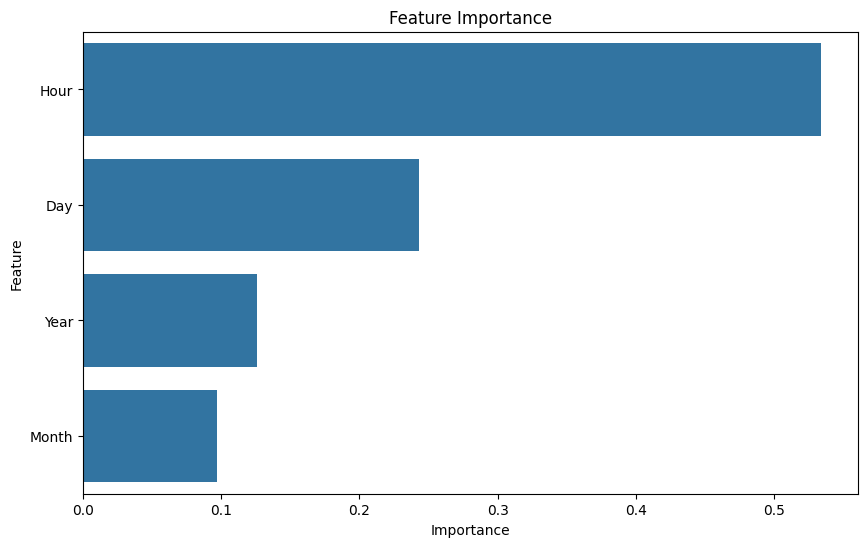

In [721]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns
importances = rf_regressor.feature_importances_
feature_names = X.columns

# Create a DataFrame for feature importance
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Sort the DataFrame by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance')
plt.show()

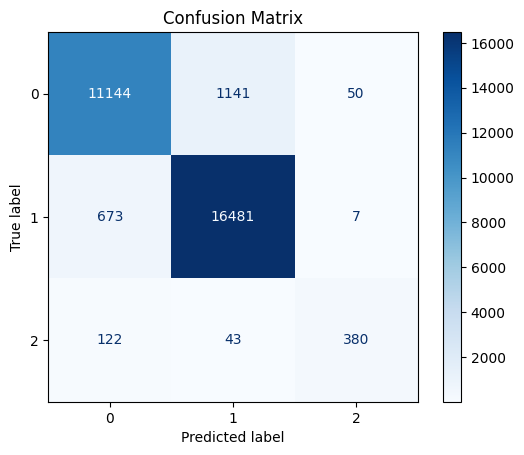

In [722]:
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf_regressor.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

### GBM Classifier 

In [166]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

### Feature selection

In [167]:
y = merged_df['Severity_Categorical']

features = ['Hour','Month', 'Year', 'Day'] #holiday adds 0.002
X = merged_df[features]

In [168]:
Categorical_features = X.select_dtypes(include=["object"]).columns
X[categorical_features] = X[categorical_features].astype(str)

categorical_features = X.select_dtypes(
   include=["object"]
).columns.tolist()

numerical_features = X.select_dtypes(
   include=["float64", "int64", "int32"]
).columns.tolist()

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

### Splitting the data into train and test

In [169]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Training the model

In [170]:
gbm_classifier = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Create a pipeline that first transforms the data and then applies the classifier
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', gbm_classifier)
])

# Train the model
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)


### Evaluation

In [171]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.96      0.94     14151
           1       0.75      0.63      0.69      2633
           2       1.00      0.31      0.48       483

    accuracy                           0.90     17267
   macro avg       0.89      0.64      0.70     17267
weighted avg       0.89      0.90      0.89     17267



## Modelling - Prediction of exact duration 

In order to predict the exact duration of traffic jam i plan on utilizing several models as RF Regressor, GBR, SVR, LSTM, and Ada boosting, however, i didnt achieve yet higher accuracy and this is why they are not included in this file.